In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import os
import json

In [4]:
os.listdir('/content/drive/MyDrive/data')

['wordlists.csv',
 'synonyms.csv',
 'Readme.gdoc',
 'synonyms.gsheet',
 'wordlists.gsheet',
 'Example Ads.gdoc',
 'indeed.json',
 'Annotation-Corinne.gdoc',
 'score_dict.txt',
 'score_dict.gdoc',
 'rank_dict.txt',
 'rank_list.png']

you first need to create a shortcut of the data folder (under ICT-Gender Bias shared folder) to your google drive

In [5]:
os.chdir('/content/drive/MyDrive/data')

In [ ]:
# !gunzip indeed.json.gz

In [6]:
indeed = []
for line in open('indeed.json', 'r', encoding ='utf-8'):
    newline = json.loads(line)
    indeed.append(newline)

# New section

In [ ]:
len(indeed)

259723

In [ ]:
indeed[0].keys()

dict_keys(['_id', 'jk', 'city', 'cmp', 'cmpesc', 'cmpid', 'cmplnk', 'country', 'efccid', 'loc', 'locid', 'num', 'rd', 'srcid', 'srcname', 'title', 'zip', 'last_scraped', 'category', 'html', 'sentence', 'lemmas'])

In [ ]:
indeed[1]['sentence']

['Job profile',
 'Job details',
 'Job details',
 'Waking Night Support Workers Full time and Part time',
 'Recruiting for a Waking Night Support Worker to join our Hounslow Young People Service !',
 'GBP 22,568 ( FTE ) per annum working 40 hours per week , plus 25 days Annual Leave , Pension schemes , Staff discounts , healthcare and more .',
 'Please note this is pro rata for part time staff .',
 'Hounslow Young People is Supported Accommodation Service for young people and young parents aged 16-25 in Hounslow .',
 'The Service encompasses a mix of units across six sites supporting 57 vulnerable young people and 19 teen parents .',
 'The aim of the service is to empower Young People to move towards independent living , supporting their successful transition from childhood ; laying the foundations for healthy , ambitious , and safe adult lives with minimal ongoing support .',
 'Support is delivered in partnership with a number of stakeholders and partners in the community such as menta

In [ ]:
# import pandas as pd
# wordlist = pd.read_csv('wordlists.csv')
# wordlist_eng = wordlist[wordlist['lang']=='en']

In [8]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 24.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 74.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.4/182.4 KB 17.0 MB/s eta 0:00:00


In [9]:
import torch
import torch.nn.functional as F
from transformers import BertTokenizer, BertModel

In [10]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained("bert-base-uncased", output_hidden_states = True)

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
traits_1 = ['you are self-reliance', 'capable', 'challenging', 'independent', 'persistent', 'proactive']

In [ ]:
# 100 examples in the indeed
job_ads = [ job['sentence']  for job in indeed[:100]]

In [ ]:
job_ads[0]

['24 DAYS LEFT TO APPLY', '2 DOCUMENTS AVAILABLE']

In [ ]:
text = job_ads[0][0]

In [ ]:
text

'24 DAYS LEFT TO APPLY'

In [ ]:
tokenizer.tokenize(job_ad)

['24', 'days', 'left', 'to', 'apply']

In [ ]:
encoded_input = tokenizer(text, return_tensors='pt')

In [ ]:
encoded_input

{'input_ids': tensor([[ 101, 2484, 2420, 2187, 2000, 6611,  102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1]])}

In [ ]:
output = model(**encoded_input)

In [ ]:
output.last_hidden_state.shape

torch.Size([1, 7, 768])

In [ ]:
hidden_states = output[2]

In [ ]:
len(hidden_states)

13

In [ ]:
hidden_states[0].shape

torch.Size([1, 7, 768])

# Imported job ad model

In [ ]:
from transformers import AutoModel
model = AutoModel.from_pretrained("jjzha/jobspanbert-base-cased")

Some weights of the model checkpoint at jjzha/jobspanbert-base-cased were not used when initializing BertModel: ['cls.span_predictions.start_transform.dense.weight', 'cls.span_predictions.query_end_transform.dense.weight', 'cls.span_predictions.query_start_transform.LayerNorm.weight', 'cls.span_predictions.query_end_transform.dense.bias', 'cls.span_predictions.start_transform.LayerNorm.weight', 'cls.span_predictions.query_end_transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.span_predictions.query_start_transform.dense.bias', 'cls.span_predictions.query_start_transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.span_predictions.end_classifier', 'cls.predictions.transform.dense.weight', 'cls.span_predictions.end_transform.dense.weight', 'cls.span_predictions.query_start_transform.dense.weight', 'cls.span_predictions.start_transform.dense.bias', 'cls.span_predictions.end_transform.dense.bias', 'cls.span_predic

In [ ]:

def bert_embd(text):

  encoded_input = tokenizer(text, return_tensors='pt')
  output = model(**encoded_input)
  hidden_states = output.hidden_states

  # 
  token_embd = torch.stack(hidden_states, dim=0)
  token_embd = torch.squeeze(token_embd, dim=1)
  token_embd = token_embd.permute(1, 0, 2)

  # sum the last four hidden states as word embd
  token_vec_sum = [torch.sum(token[-4:], dim=0) for token in token_embd]

  # sentence embd
  token_vec = hidden_states[-2][0]
  sent_embd = torch.mean(token_vec, dim=0)

  return encoded_input['input_ids'], 

In [ ]:
def cos_sim(job_ad, trait):

  trait_token_ids, trait_word_embd, trait_embd = text_tensorizer(trait)

  cos_sim_dict = dict()

  for sent in job_ad:
    token_ids, word_embd, sent_embd = text_tensorizer(sent)
    cos_sim_score = F.cosine_similarity(tri_embd, trait_embd, dim=0)
    score_dict[sent] = cos_sim_score.item()


### Sentence Transformer & Trigrams

In [ ]:
!pip install sentence_transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sentence_transformers import SentenceTransformer

In [ ]:
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')
import string
remove_punctuation = dict((ord(char), None) for char in string.punctuation)

In [ ]:
# traits
traits_1 = ['self-reliance', 'capable', 'challenging', 'independent', 'persistent', 'proactive']

In [ ]:
# 100 examples in the indeed
job_ads = [ job['sentence']  for job in indeed[:100]]

In [ ]:
model = SentenceTransformer('all-MiniLM-L6-v2')

def cos_simi(job_ad, trait):

  score_dict = dict()
  trait_embd = model.encode(' '.join(trait))
  trait_embd = torch.Tensor(trait_embd)

  for sent in job_ad:
    sent = sent.translate(remove_punctuation)
    tokens = nltk.word_tokenize(sent)
    tokens = [i.lower() for i in tokens]
    tokens = [i for i in tokens if i not in stopwords.words('english')]
    if len(tokens) > 2:
      trigrams = [tokens[i:i+3] for i in range(len(tokens)-2)]
      # trigrams = nltk.trigrams(tokens)
      for triples in list(trigrams):
        triple_text = ' '.join(triples)
        tri_embd = model.encode(triple_text)
        tri_embd = torch.Tensor(tri_embd)
        cos_sim = F.cosine_similarity(tri_embd, trait_embd, dim=0)
        score_dict[triple_text] = cos_sim.item()
  
  sorted_x = sorted(score_dict.items(),key = lambda x:x[1],reverse = True)

  return sorted_x[:5]

In [ ]:
score = cos_simi(job_ad, traits_1)

In [ ]:
score

[('work extremely rewarding', 0.3876437246799469),
 ('activities daily living', 0.33645516633987427),
 ('putting spare time', 0.3263479769229889),
 ('daily living throughout', 0.3210889995098114),
 ('help activities daily', 0.301276296377182)]

In [ ]:
for job_ad in job_ads[:10]:
  score = cos_simi(job_ad, traits_1)
  print(score)

[('24 days left', 0.02316933684051037), ('2 documents available', 0.002926597837358713), ('days left apply', 0.002804041840136051)]
[('towards independent living', 0.49841827154159546), ('actively seek ways', 0.49112796783447266), ('move towards independent', 0.4043741524219513), ('individuals ensure continues', 0.40344229340553284), ('seek ways work', 0.4020736813545227)]
[('seeking highly motivated', 0.4744707942008972), ('take responsibility practical', 0.4224514365196228), ('actively participate prevention', 0.40254834294319153), ('identify personal development', 0.39758971333503723), ('achieve positive effective', 0.38356560468673706)]
[('skills independent person', 0.5205800533294678), ('skills maintain wellbeing', 0.4642127454280853), ('develop skills independent', 0.44137465953826904), ('behavioural needs live', 0.41745156049728394), ('develop skills maintain', 0.39999839663505554)]
[('waking night support', 0.15818876028060913), ('night support worker', 0.0951041728258133), ('

In [ ]:
def sentence_score(ad, trait_embd):
  results = []
  for sent in ad:
    encoded_input = tokenizer(sent, return_tensors='pt')
    out = model(**encoded_input)
    sent_embd = out.pooler_output.squeeze(0)
    cos_sim = F.cosine_similarity(trait_embd, sent_embd, dim=0)
    results.append([cos_sim.item(), sent])
  return results

results = sentence_score(job_ads[2], embed_trait(['dominant', 'controlling', 'power']))
for similarity, sentence in results:
  print(similarity, sentence)

NameError: ignored

# Visualisations


In [ ]:
# !pip install embetter
# !pip install embetter[sentence-tfm]
!pip install sentence_transformers

In [12]:
import pandas as pd
from sklearn.pipeline import make_pipeline 
from sklearn.linear_model import LogisticRegression
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
# from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
import numpy as np
from sklearn.decomposition import PCA
import torch
import torch.nn.functional as F
from transformers import BertTokenizer, BertModel
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')
import string
remove_punctuation = dict((ord(char), None) for char in string.punctuation)
remove_punctuation[8220] = None
remove_punctuation[8221] = None
from string import digits
remove_digits = str.maketrans('', '', digits)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [13]:
# embedder = SentenceTransformer('all-MiniLM-L6-v2')
annotated_ads= [49913, 49860, 49832, 49825, 49821, 49796]
job_ads=[]
for x in annotated_ads:
  job_ads.append(indeed[x]['sentence'])

Cluster  1
['We view diversity as fundamental to our success .']

Cluster  2
['As a member of the Building Management team in PSD , this role provides locally based hands-on support to the delivery of Facilities Management ( FM ) and property related services in the buildings within the Area you are working .', 'This role is important in maintaining an exemplary service to senior officers and staff in the significant , operationally critical and highly sensitive buildings .', 'Reporting to the Building Manager , this role works in more than one building : Supporting the delivery all soft and hard FM services ; working closely with police officers and staff ; monitoring compliance with all relevant Health & Safety ( H & S ) and related regulation ; helping to improve utilisation and working practices through monitoring the adoption of ‘ blended working ’ ; and providing on site support for all people moves and related activities .', 'PSD operates a strategic and commercial service deliv

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


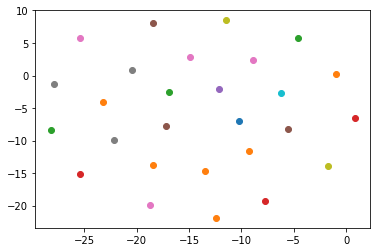

In [ ]:
# Corpus with example sentences
# 100 examples in the indeed
corpus = job_ads[1]
corpus_embd=[]
for sent in corpus:
    token_ids, word_embd, sent_embd = bert_embd(sent)
    corpus_embd.append(sent_embd.tolist())
corpus_embeddings=corpus_embd

# Perform kmean clustering
num_clusters = 10
clustering_model = KMeans(n_clusters=num_clusters)
clustering_model.fit(corpus_embeddings)
cluster_assignment = clustering_model.labels_

clustered_sentences = [[] for i in range(num_clusters)]
for sentence_id, cluster_id in enumerate(cluster_assignment):
    clustered_sentences[cluster_id].append(corpus[sentence_id])

for i, cluster in enumerate(clustered_sentences):
    print("Cluster ", i+1)
    print(cluster)
    print("")

tsne = TSNE(n_components=2, random_state=0)
v2d = tsne.fit_transform(corpus_embeddings)
u_labels = np.unique(cluster_assignment)
for i in u_labels:
    plt.scatter(v2d[cluster_assignment == i , 0] , v2d[cluster_assignment == i , 1] , label = i)
plt.show()

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


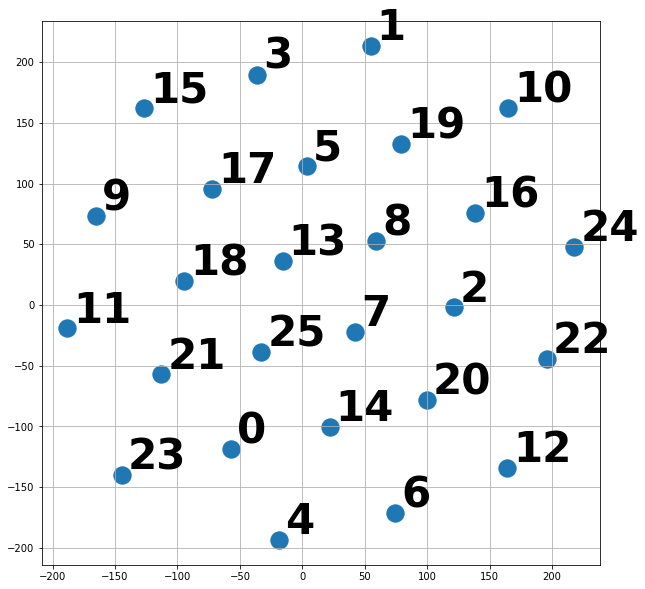

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


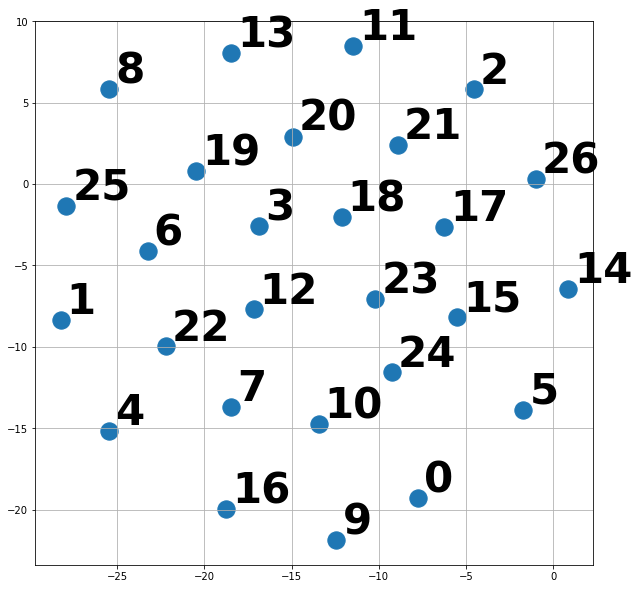

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


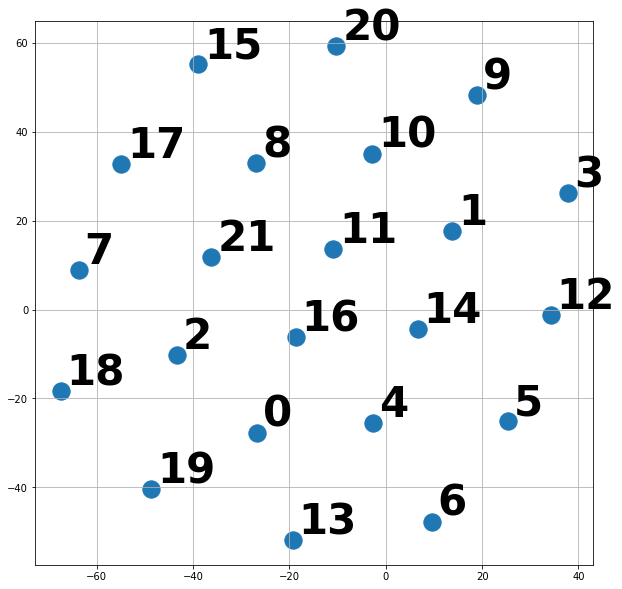

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


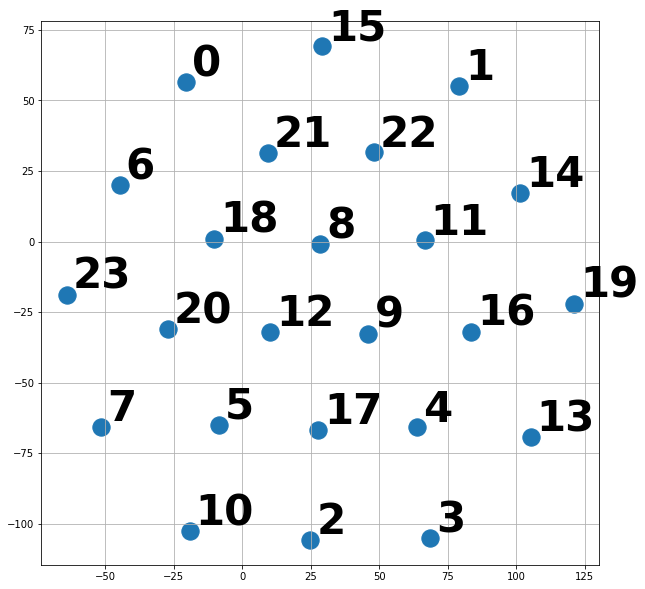

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


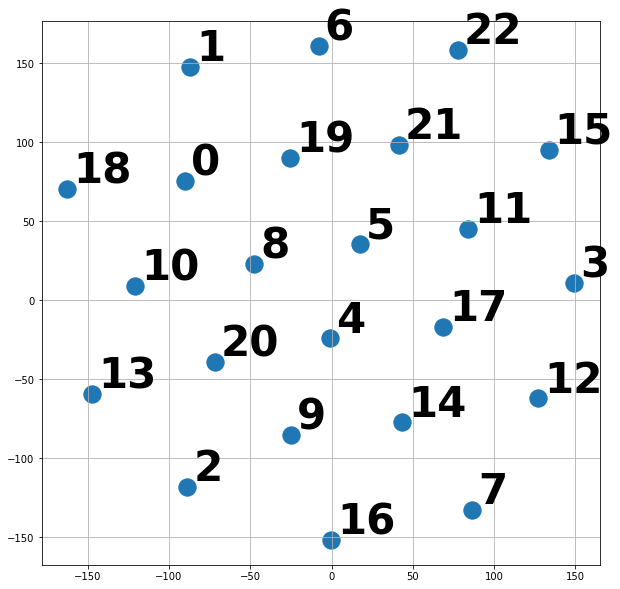

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


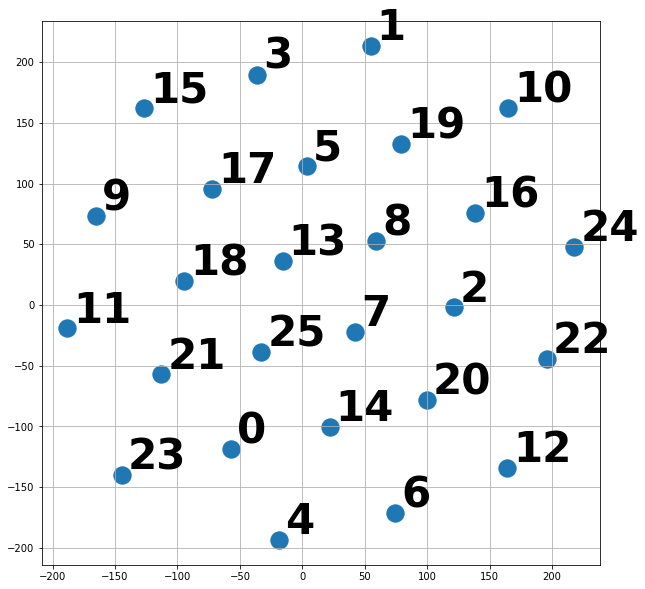

In [ ]:
for x in range(len(job_ads)):
  embedder = SentenceTransformer('all-MiniLM-L6-v2')
  corpus = job_ads[x]
  corpus_embeddings = embedder.encode(corpus)
  tsne = TSNE(n_components=2, random_state=0)
  v2d = tsne.fit_transform(corpus_embeddings)
  v2d.shape
  plt.scatter(v2d[:, 0], v2d[:, 1], s=300)

  for label, x, y in zip(range(91),v2d[:, 0], v2d[:, 1]):
      plt.annotate(label, xy=(x, y), xytext=(6, 6), textcoords="offset points", fontsize=42, fontweight='bold')

  # plt.xlim(-100,400)
  # plt.ylim(-400,100)
  plt.grid()
  plt.gcf().set_size_inches((10, 10))    
  plt.show()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


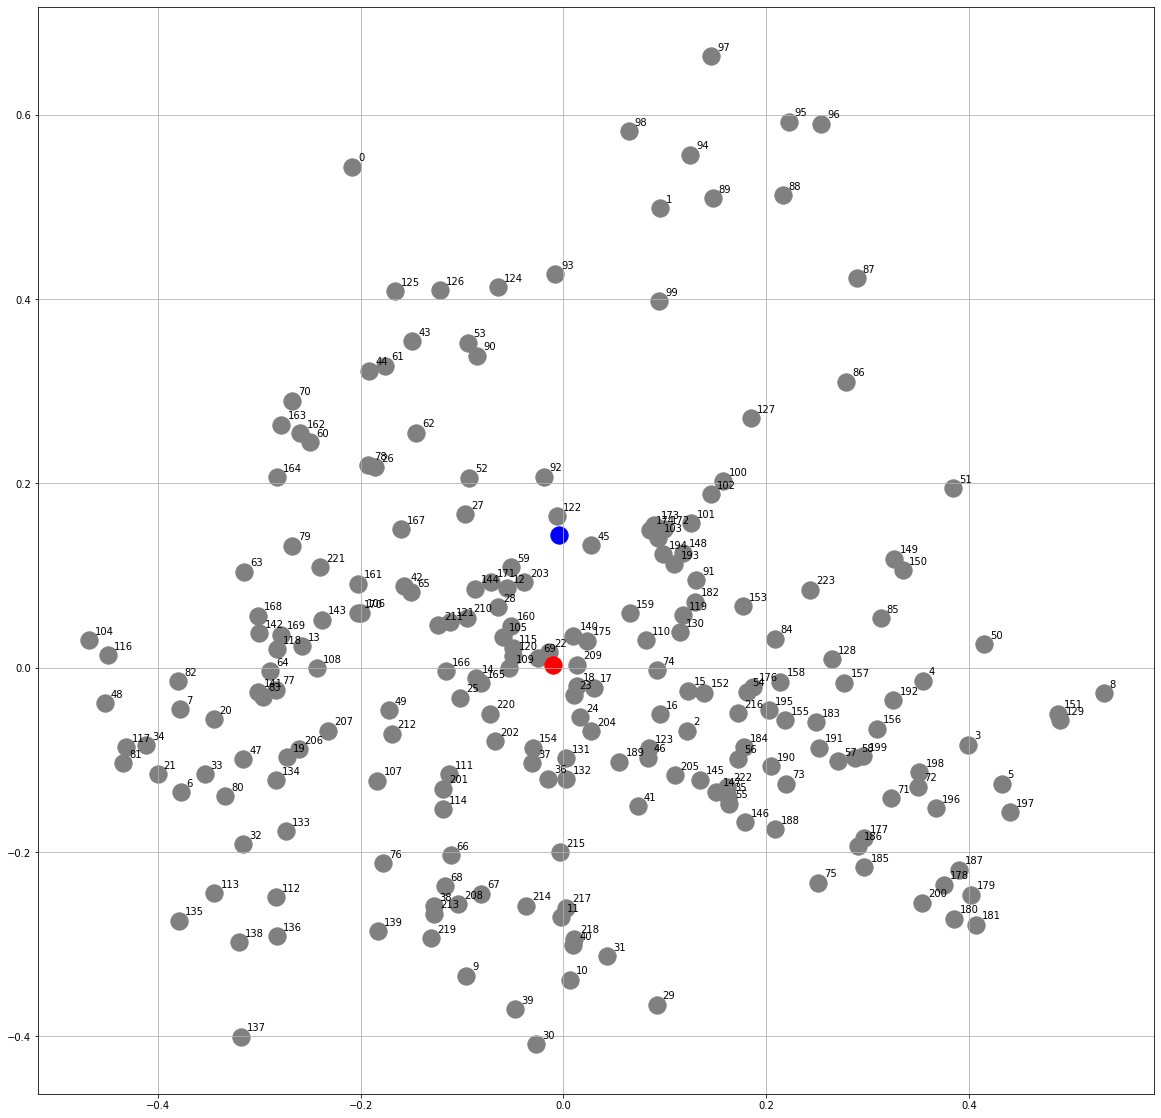

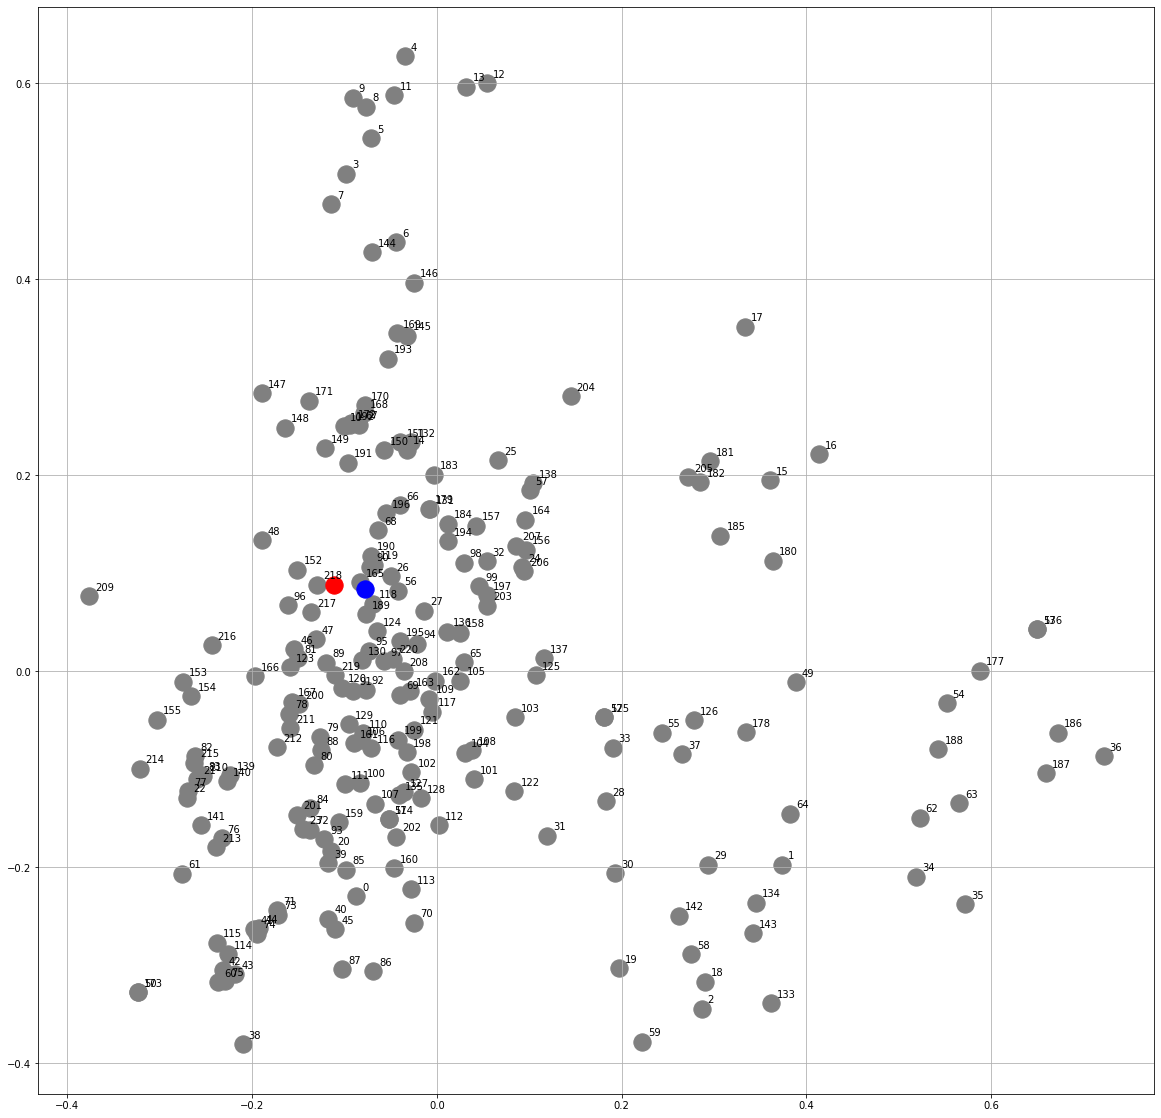

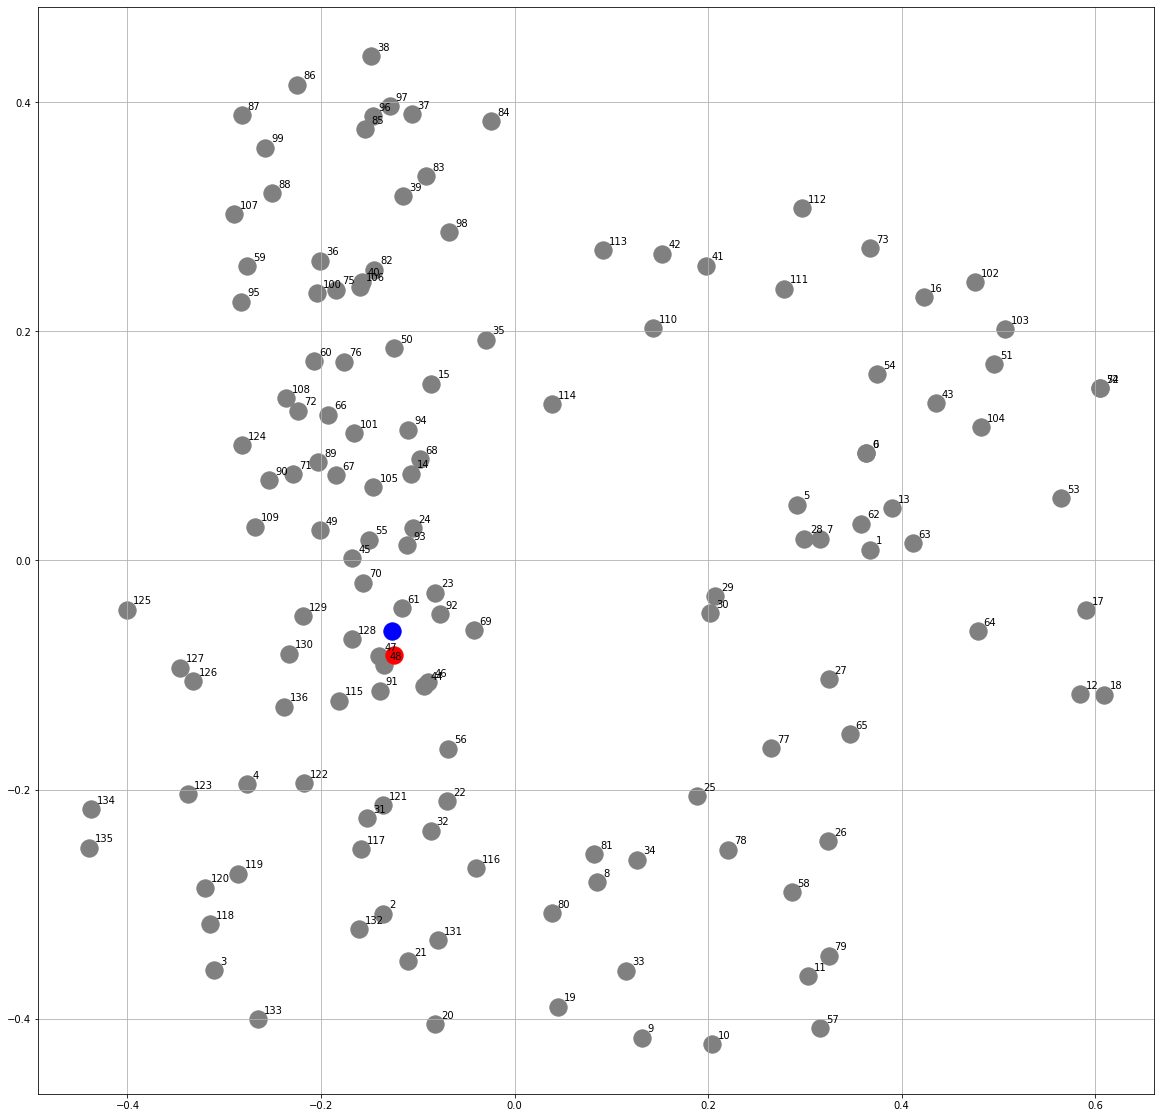

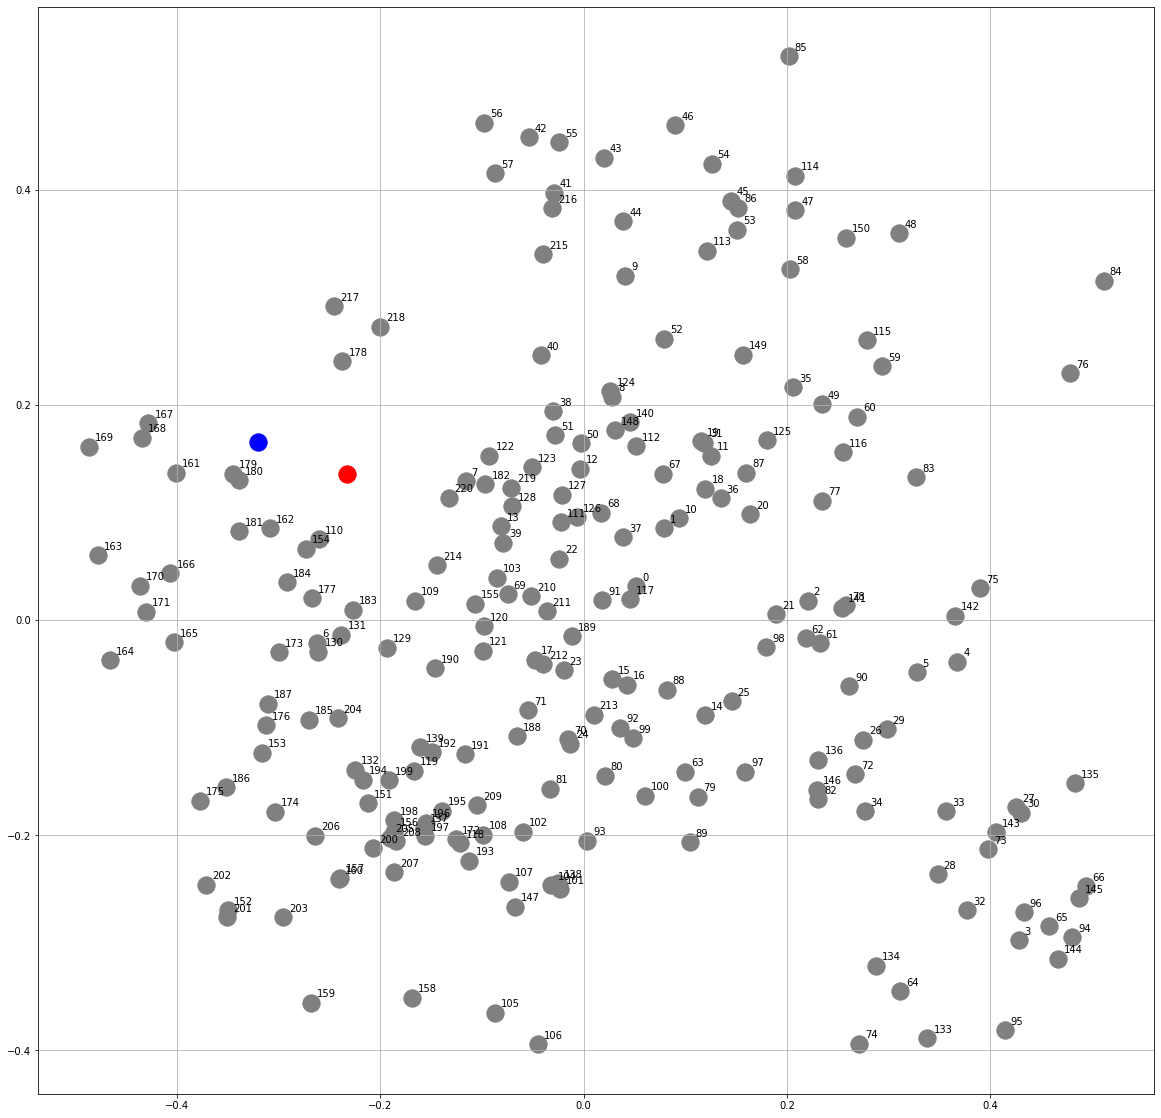

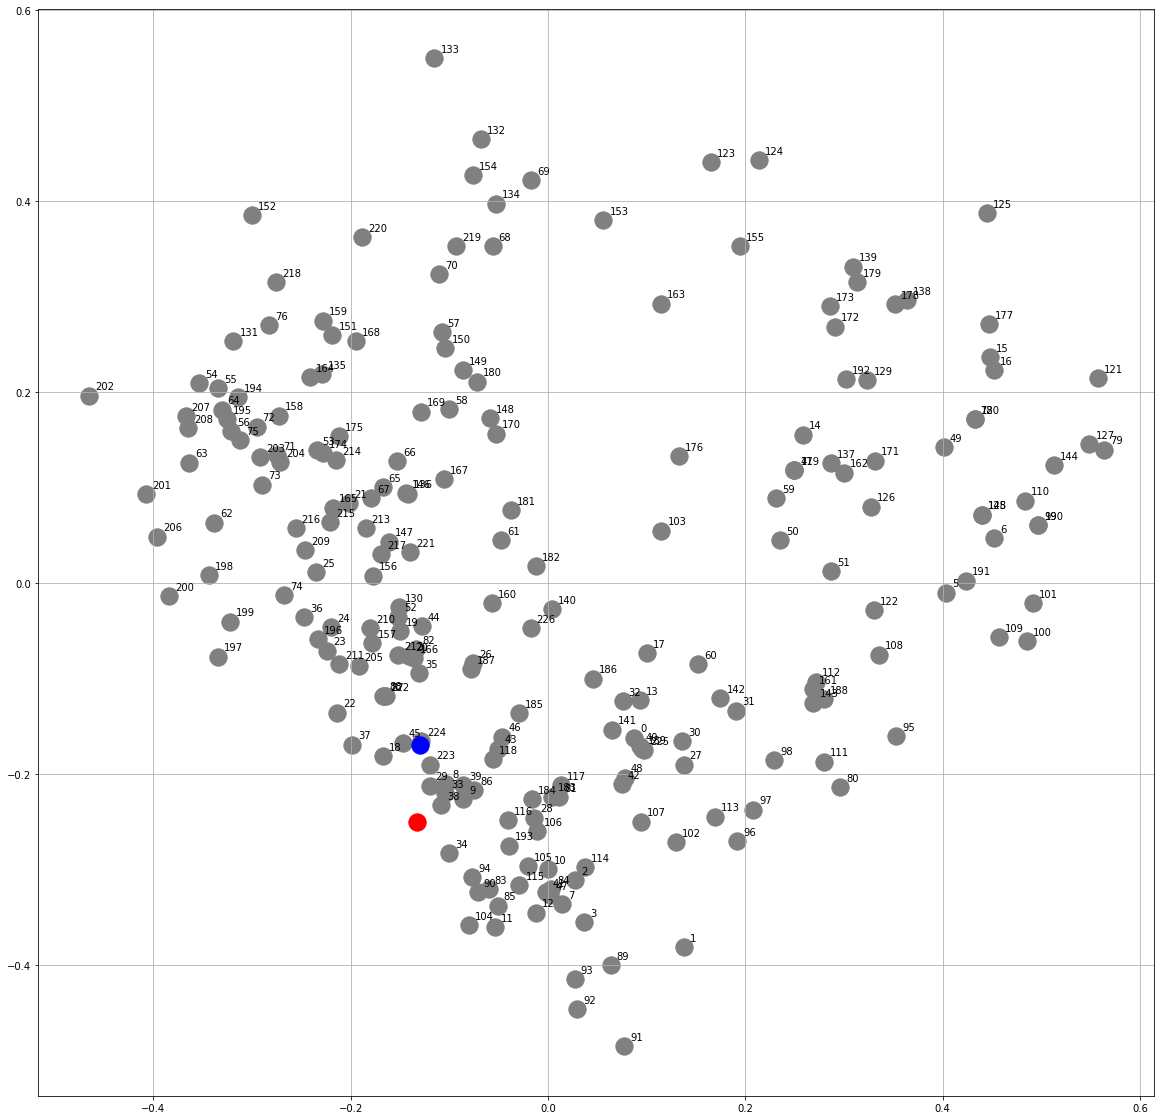

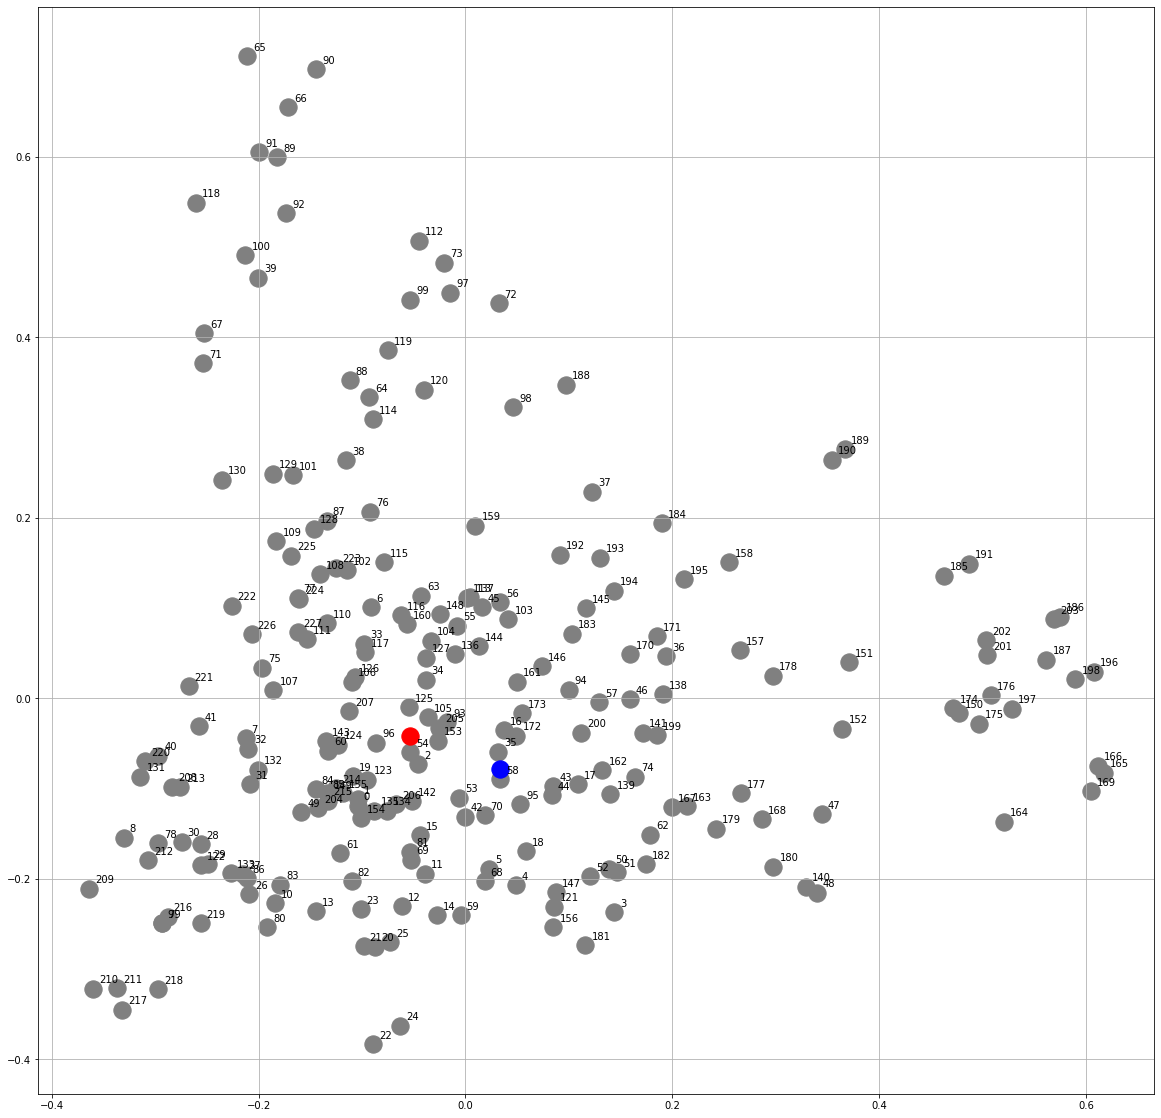

In [ ]:
for x in range(len(job_ads)):
# for x in range(1):
  embedder = SentenceTransformer('all-MiniLM-L6-v2')
  job_ad = job_ads[x]
  tri_grams=[]
  for sent in job_ad:
      sent = sent.translate(remove_punctuation)
      tokens = nltk.word_tokenize(sent)
      tokens = [i.lower() for i in tokens]
      tokens = [i for i in tokens if i not in stopwords.words('english')]
      if len(tokens) > 2:
        trigrams = [tokens[i:i+3] for i in range(len(tokens)-2)]
        # trigrams = nltk.trigrams(tokens)
        for triples in list(trigrams):
          triple_text = ' '.join(triples)
          tri_grams.append(triple_text)
  corpus_embeddings = embedder.encode(tri_grams)

  # rational_words=['rational', 'logical', 'analytical'] 
  rational_words=['you', 'are', 'rational'] 
  rational_embd = embedder.encode(' '.join(rational_words))
  np.append(corpus_embeddings, rational_embd)
  # intuitive_words=['perceptive', 'intuitive', 'understanding']
  intuitive_words=['you', 'are', 'sensitive']
  intuitive_embd = embedder.encode(' '.join(intuitive_words))
  np.append(corpus_embeddings, intuitive_embd)

  # tsne = TSNE(n_components=2, random_state=0)
  # v2d = tsne.fit_transform(corpus_embeddings)

  pca = PCA(n_components=2, random_state=0)
  v2d = pca.fit_transform(corpus_embeddings)
  # print(v2d.shape[0]-2)
  # plt.scatter(v2d[:, 0], v2d[:, 1], s=300)
  plt.scatter(v2d[:v2d.shape[0]-3, 0], v2d[:v2d.shape[0]-3, 1], s=300, color='grey')
  plt.scatter(v2d[v2d.shape[0]-2, 0], v2d[v2d.shape[0]-2, 1], s=300, color='blue')
  plt.scatter(v2d[v2d.shape[0]-1, 0], v2d[v2d.shape[0]-1, 1], s=300, color='red')   


  for label, x, y in zip(range(v2d.shape[0]-3),v2d[:v2d.shape[0]-3, 0], v2d[:v2d.shape[0]-3, 1]):
  # for label, x, y in zip(tri_grams,v2d[:, 0], v2d[:, 1]):
      plt.annotate(label, xy=(x, y), xytext=(6, 6), textcoords="offset points", fontsize=10)

  # plt.xlim(-100,400)
  # plt.ylim(-400,100)
  plt.grid()
  plt.gcf().set_size_inches((20, 20))    
  plt.show()



      

In [ ]:
from transformers import BertTokenizer, BertModel, AutoModel
model = BertModel.from_pretrained("bert-base-uncased", output_hidden_states = True)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')



Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [14]:
def bert_embd(text):

  encoded_input = tokenizer(text, return_tensors='pt')
  output = model(**encoded_input)
  hidden_states = output.hidden_states

  token_embd = torch.stack(hidden_states, dim=0)
  token_embd = torch.squeeze(token_embd, dim=1)
  token_embd = token_embd.permute(1, 0, 2)

  # sum the last four hidden states as word embd
  token_vec_sum = [torch.sum(token[-4:], dim=0) for token in token_embd]

  # sentence embd
  token_vec = hidden_states[-2][0]
  sent_embd = torch.mean(token_vec, dim=0)

  return encoded_input['input_ids'], token_vec_sum, sent_embd


/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


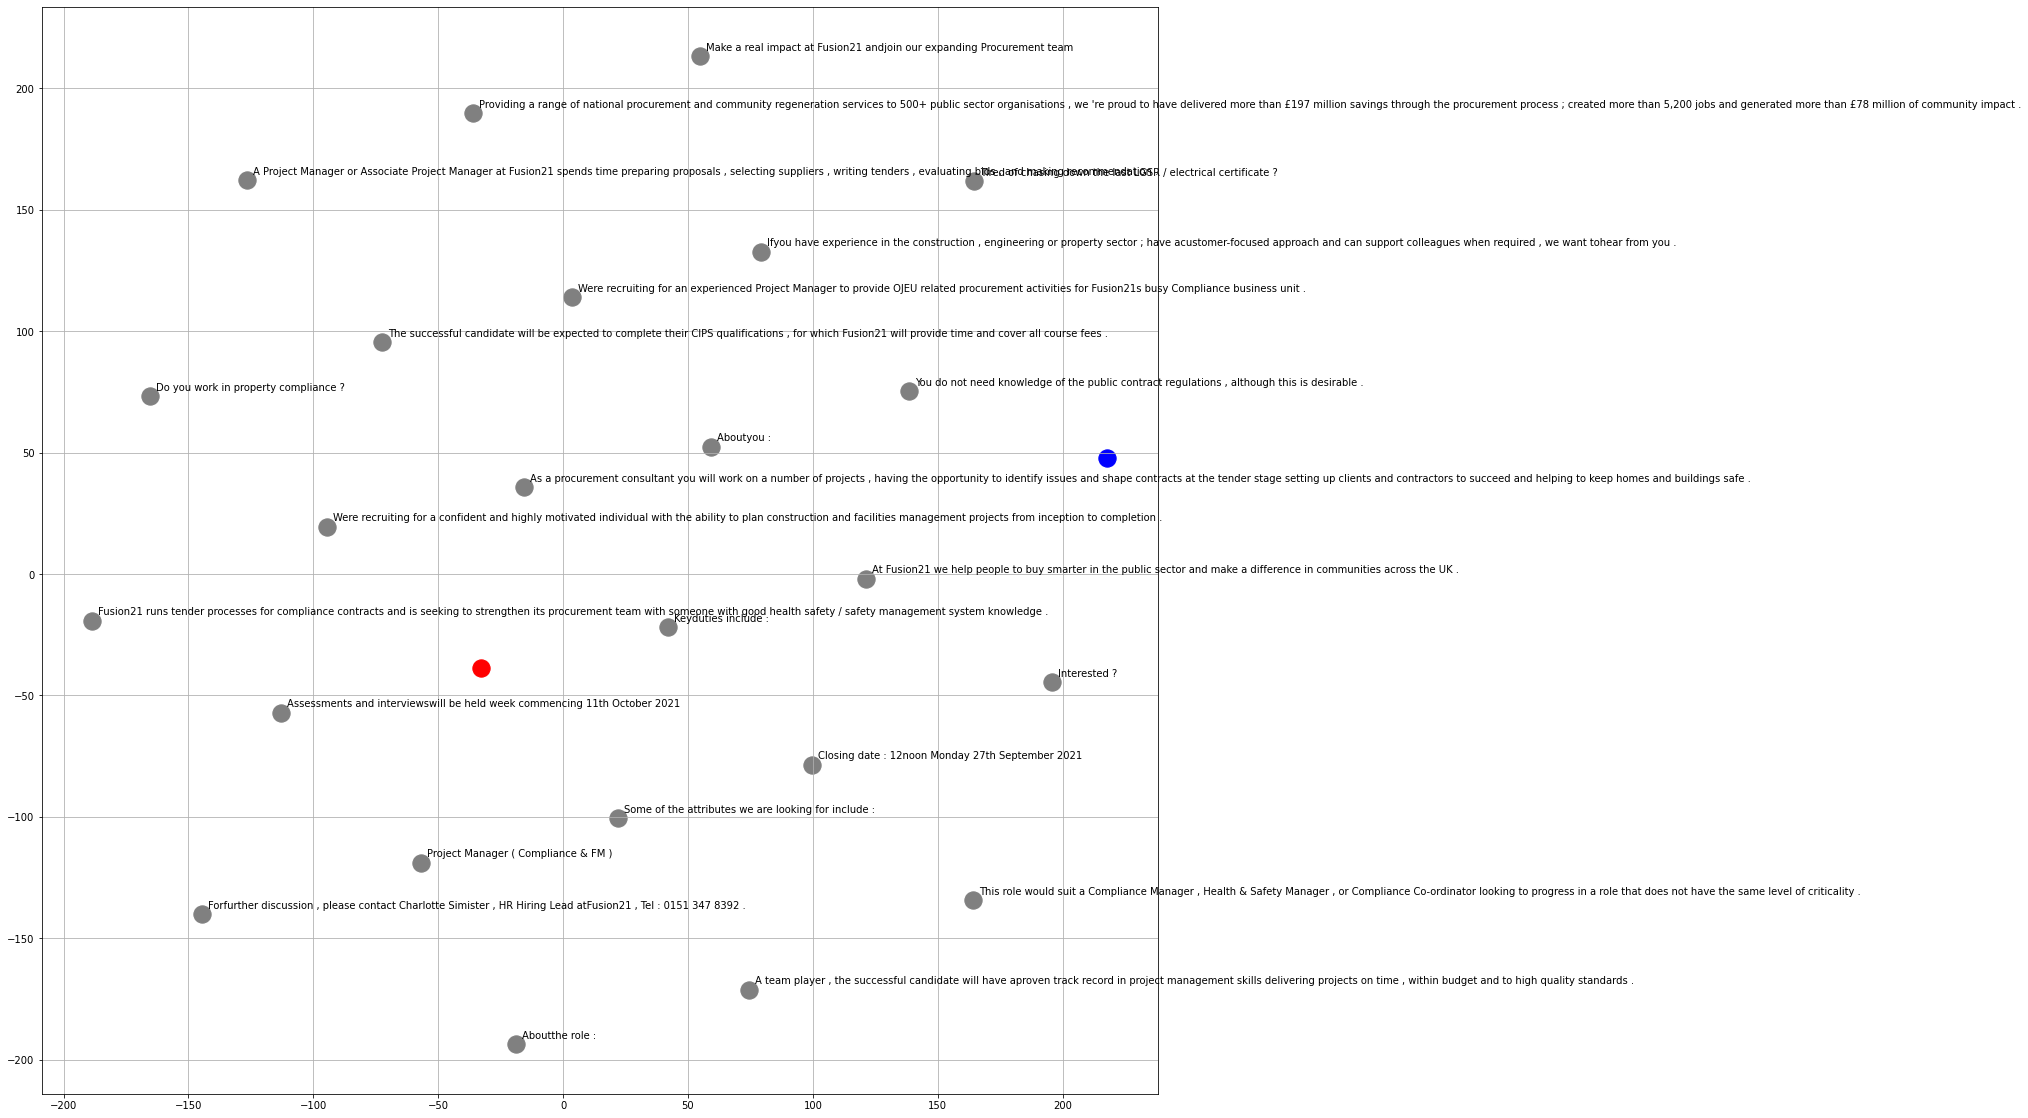

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


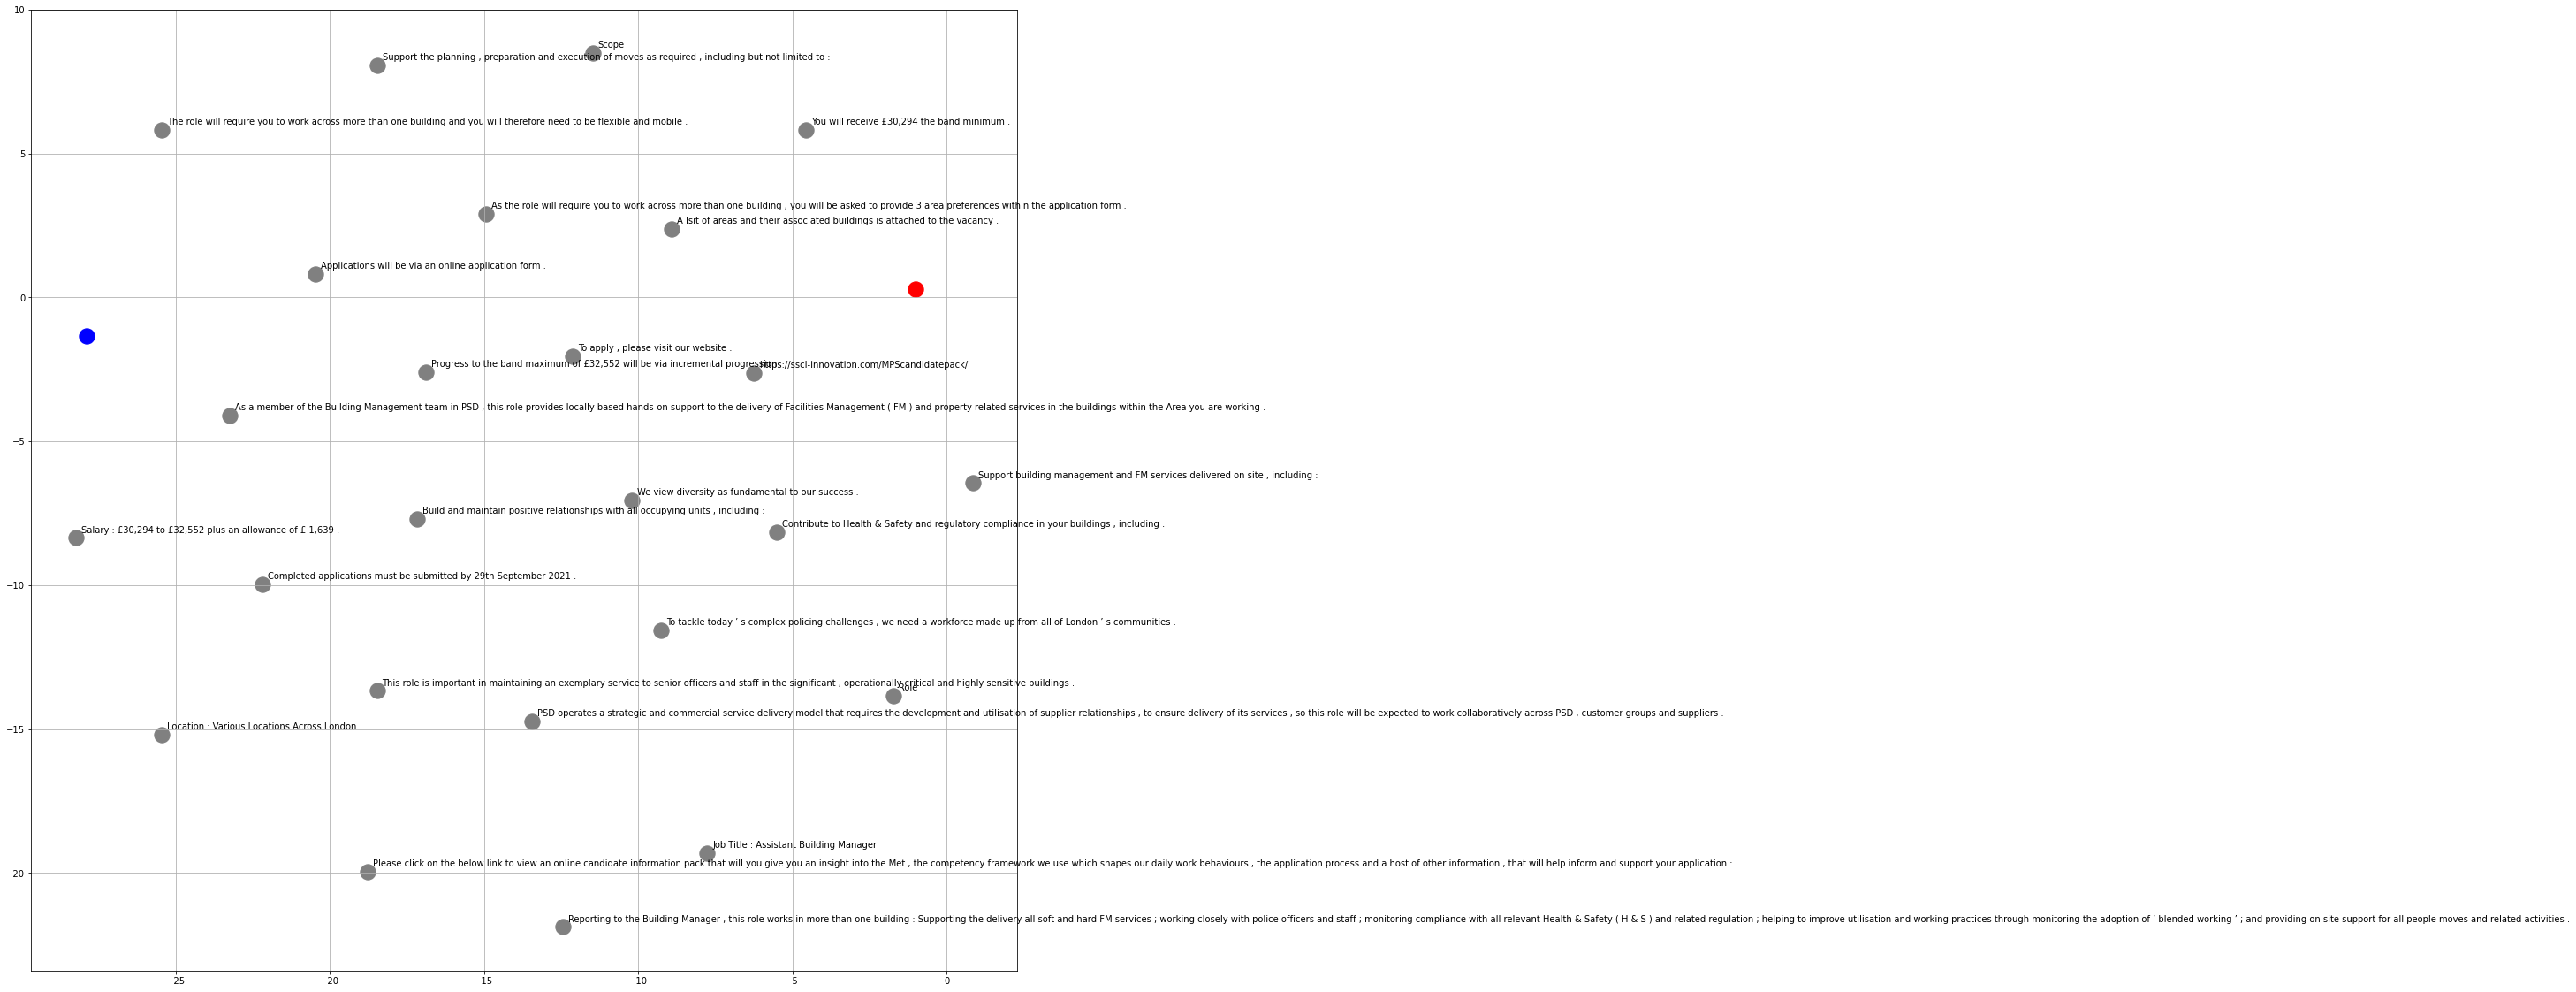

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


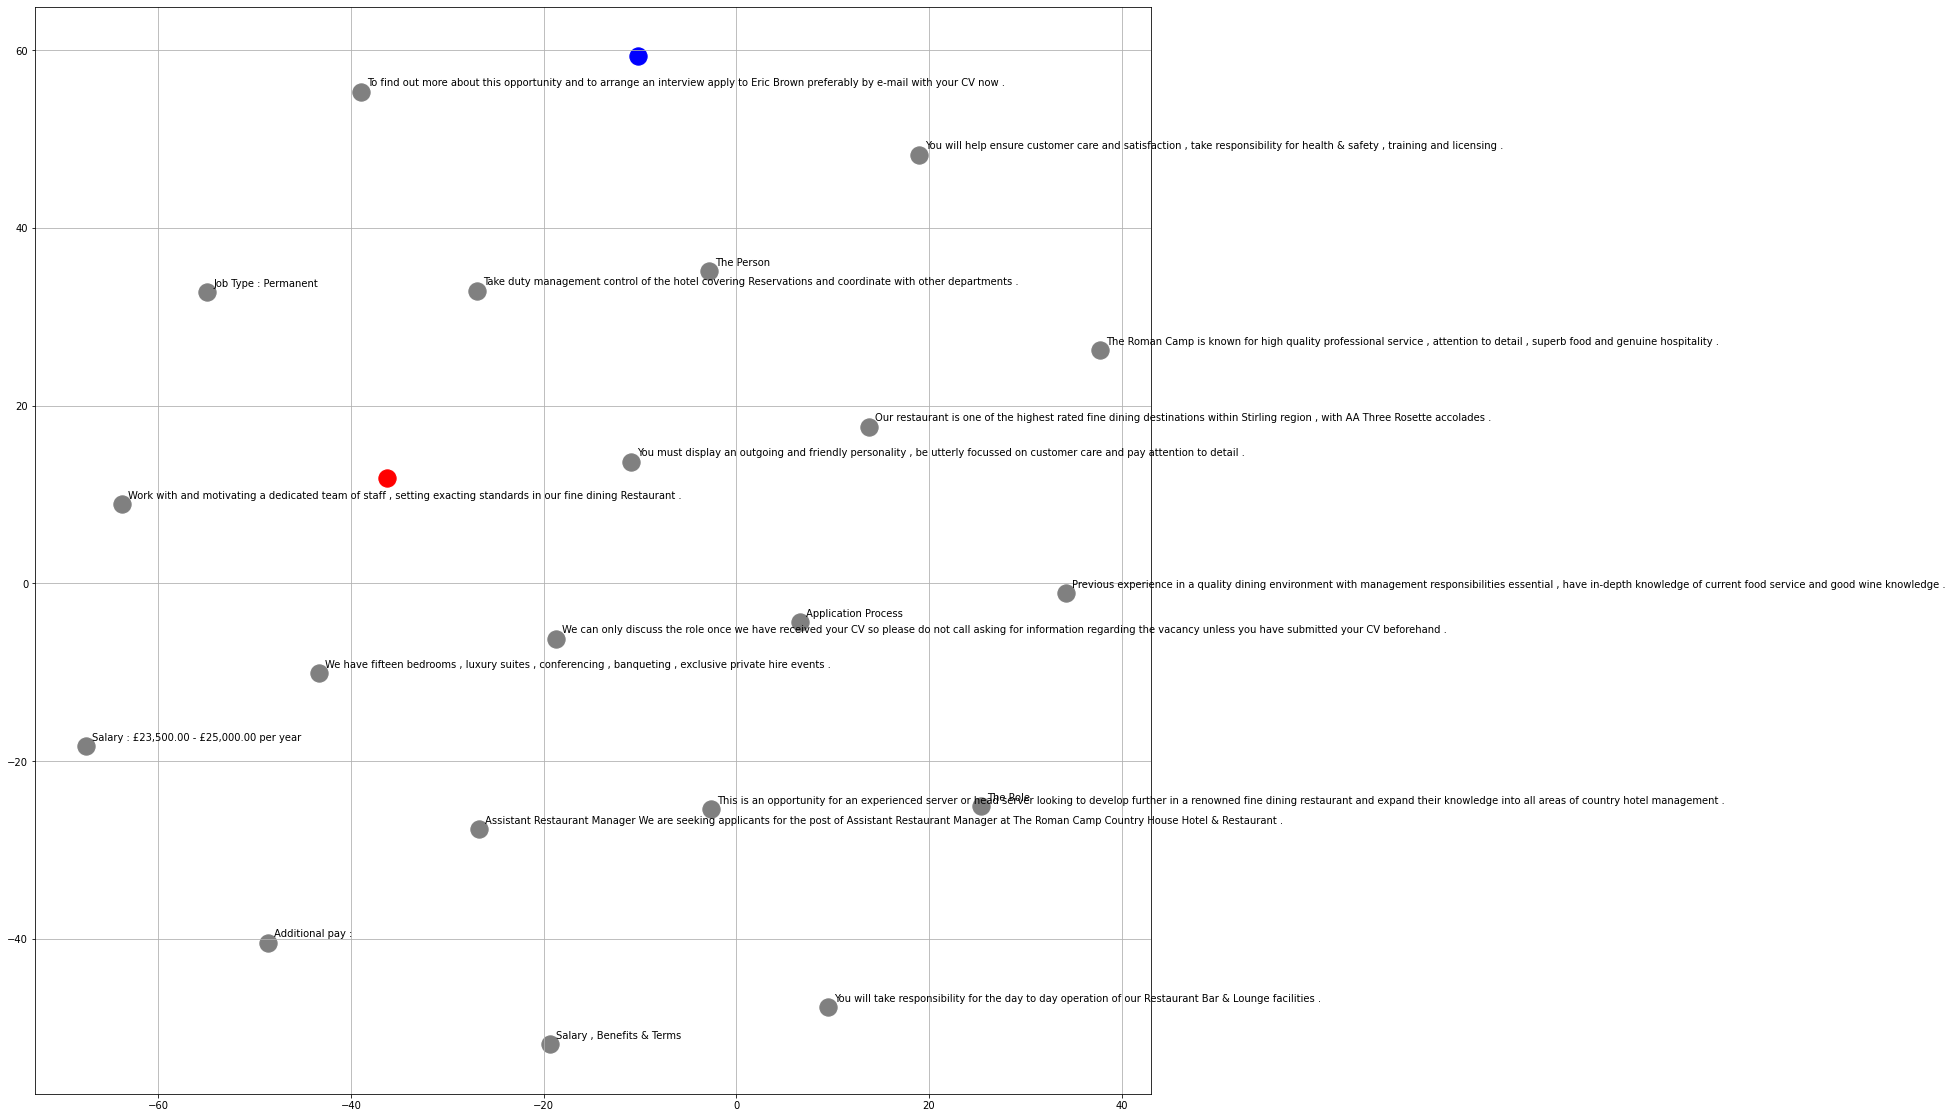

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


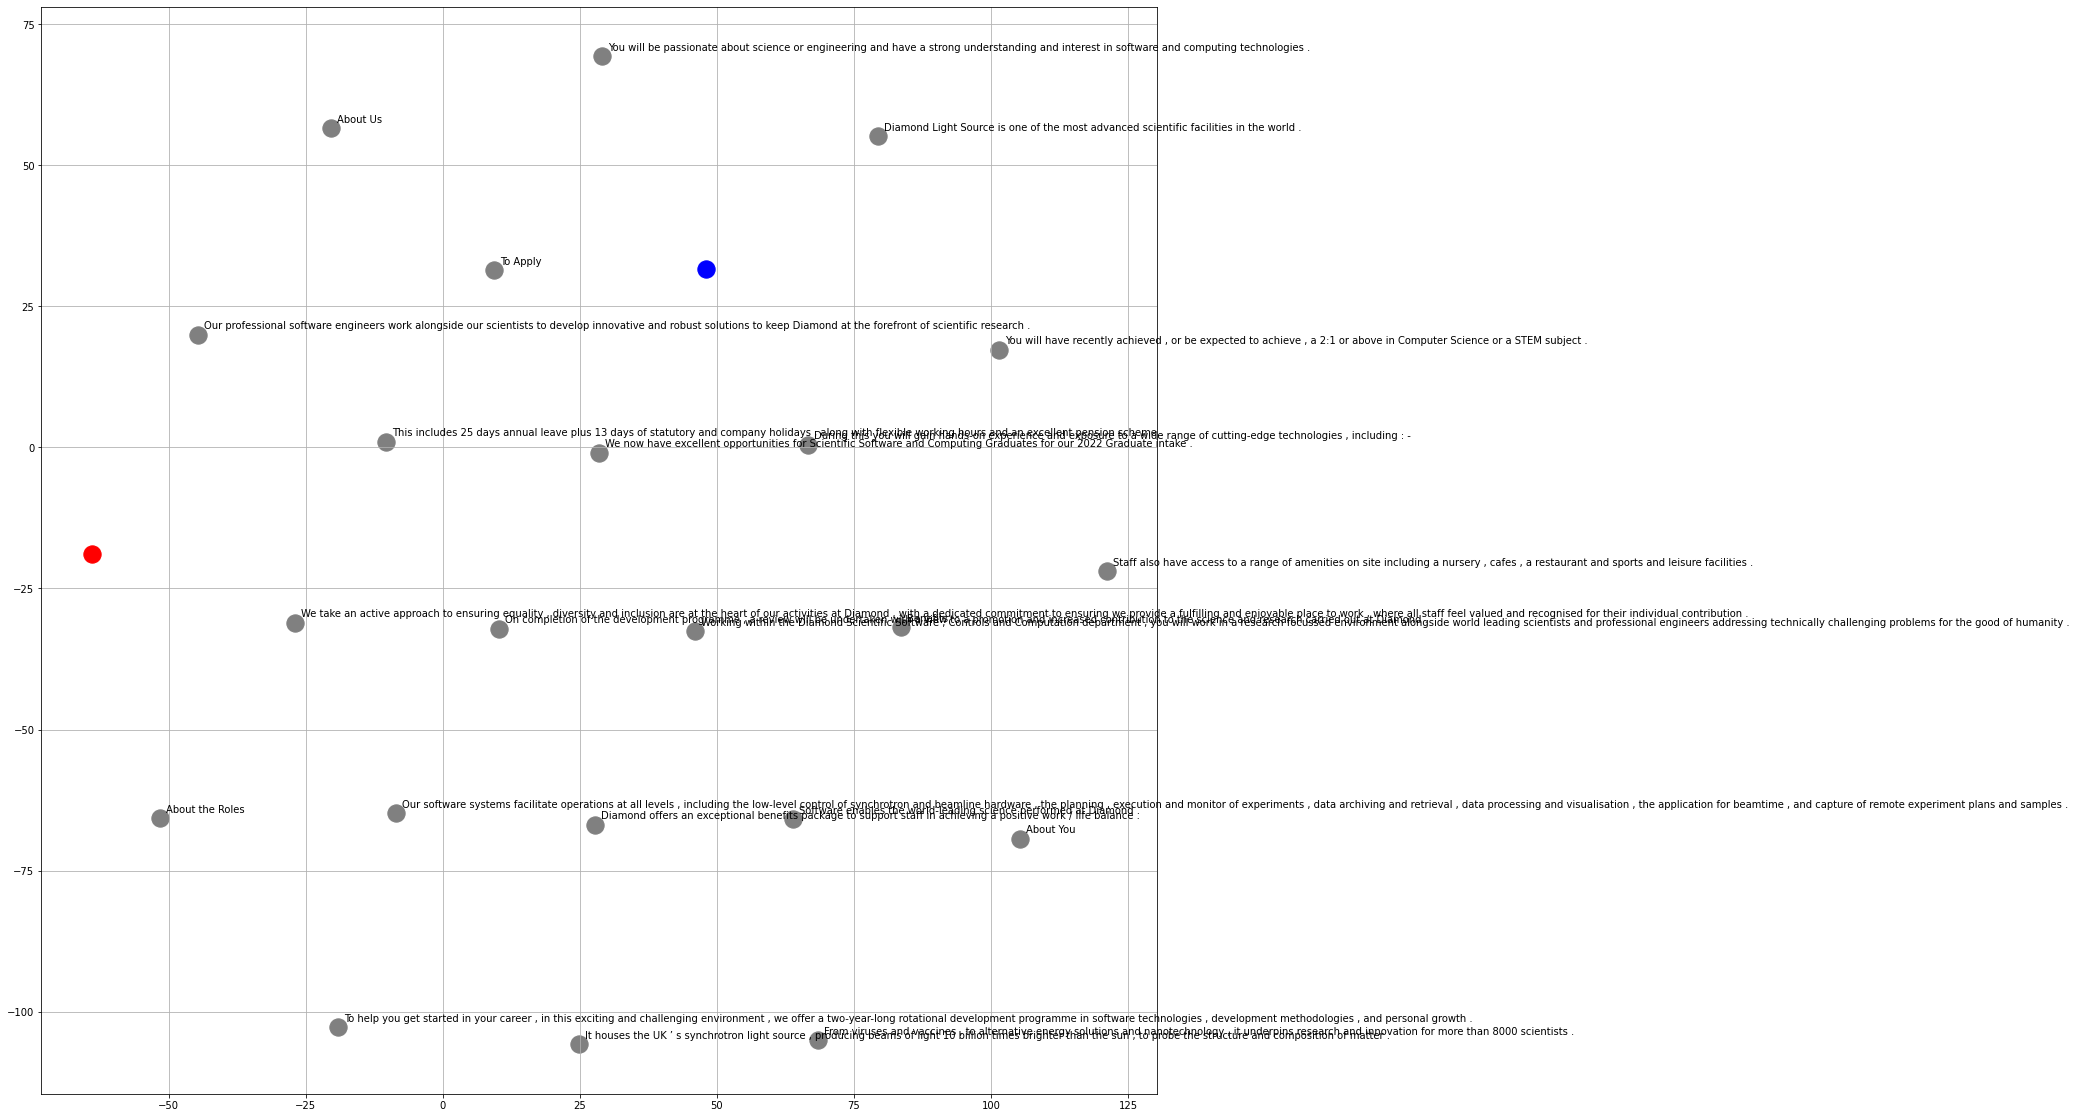

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [ ]:

for x in range(len(job_ads)):
  job_ad = job_ads[x] 
  corpus_embd=[]
  for sent in job_ad:
      token_ids, word_embd, sent_embd = bert_embd(sent)
      corpus_embd.append(sent_embd.tolist())

  tsne = TSNE(n_components=2, random_state=0)
  v2d = tsne.fit_transform(corpus_embd)
  # pca = PCA(n_components=2, random_state=0)
  # v2d = pca.fit_transform(corpus_embeddings)
  # v2d.shape


  # rational_words=['rational', 'logical', 'analytical'] 
  rational_words=['you', 'are', 'rational'] 
  token_ids, word_embd, sent_embd = bert_embd(' '.join(rational_words))
  corpus_embd.append(sent_embd.tolist())

  # intuitive_words=['perceptive', 'intuitive', 'understanding']
  intuitive_words=['you', 'are', 'sensitive']
  token_ids, word_embd, sent_embd = bert_embd(' '.join(intuitive_words))
  corpus_embd.append(sent_embd.tolist())


  # plt.scatter(v2d[:, 0], v2d[:, 1], s=300)
  plt.scatter(v2d[:v2d.shape[0]-2, 0], v2d[:v2d.shape[0]-2, 1], s=300, color='grey')
  plt.scatter(v2d[v2d.shape[0]-2, 0], v2d[v2d.shape[0]-2, 1], s=300, color='blue')
  plt.scatter(v2d[v2d.shape[0]-1, 0], v2d[v2d.shape[0]-1, 1], s=300, color='red')   


  # # for label, x, y in zip(range(v2d.shape[0]-2),v2d[:v2d.shape[0]-2, 0], v2d[:v2d.shape[0]-2, 1]):
  for label, x, y in zip(job_ad,v2d[:v2d.shape[0]-2, 0], v2d[:v2d.shape[0]-2, 1]):
    plt.annotate(label, xy=(x, y), xytext=(6, 6), textcoords="offset points", fontsize=10)

  # plt.xlim(-100,400)
  # plt.ylim(-400,100)
  plt.grid()
  plt.gcf().set_size_inches((20, 20))    
  plt.show()


In [ ]:



embedder = SentenceTransformer('all-MiniLM-L6-v2')
sent="you are logical, you are kind, you are analytical, you are intuitive you you"
tri_grams=[]
sent = sent.translate(remove_punctuation)
tokens = nltk.word_tokenize(sent)
tokens = [i.lower() for i in tokens]
print(tokens)
# tokens = [i for i in tokens if i not in stopwords.words('english')]
if len(tokens) > 2:
    trigrams = [tokens[i:i+3] for i in range(len(tokens)-2)]
    print(trigrams)
  # trigrams = nltk.trigrams(tokens)
    for triples in list(trigrams):
      triple_text = ' '.join(triples)
      tri_grams.append(triple_text)
corpus_embeddings = embedder.encode(tri_grams)

# rational_words=['rational', 'logical', 'analytical'] 
rational_words=['you', 'are', 'rational'] 
rational_embd = embedder.encode(' '.join(rational_words))
np.append(corpus_embeddings, rational_embd)
# intuitive_words=['perceptive', 'intuitive', 'understanding']
intuitive_words=['you', 'are', 'sensitive']
intuitive_embd = embedder.encode(' '.join(intuitive_words))
np.append(corpus_embeddings, intuitive_embd)

tsne = TSNE(n_components=2, random_state=0)
v2d = tsne.fit_transform(corpus_embeddings)

# pca = PCA(n_components=2, random_state=0)
# v2d = pca.fit_transform(corpus_embeddings)
# print(v2d.shape[0]-2)
# plt.scatter(v2d[:, 0], v2d[:, 1], s=300)
plt.scatter(v2d[:v2d.shape[0]-2, 0], v2d[:v2d.shape[0]-2, 1], s=300, color='grey')
plt.scatter(v2d[v2d.shape[0]-2, 0], v2d[v2d.shape[0]-2, 1], s=300, color='blue')
plt.scatter(v2d[v2d.shape[0]-1, 0], v2d[v2d.shape[0]-1, 1], s=300, color='red')   


# for label, x, y in zip(range(v2d.shape[0]-3),v2d[:v2d.shape[0]-3, 0], v2d[:v2d.shape[0]-3, 1]):
for label, x, y in zip(tri_grams,v2d[:v2d.shape[0]-2, 0], v2d[:v2d.shape[0]-2, 1]):
    plt.annotate(label, xy=(x, y), xytext=(6, 6), textcoords="offset points", fontsize=10)

# plt.xlim(-100,400)
# plt.ylim(-400,100)
plt.grid()
plt.gcf().set_size_inches((20, 20))    
plt.show()



      

In [ ]:
  job_ad = job_ads[5]
  tri_grams=[]
  for sent in job_ad:
      sent = sent.translate(remove_punctuation)
      tokens = nltk.word_tokenize(sent)
      tokens = [i.lower() for i in tokens]
      tokens = [i for i in tokens if i not in stopwords.words('english')]
      if len(tokens) > 2:
        trigrams = [tokens[i:i+3] for i in range(len(tokens)-2)]
        # trigrams = nltk.trigrams(tokens)
        for triples in list(trigrams):
          triple_text = ' '.join(triples)
          tri_grams.append(triple_text)
  print(tri_grams[54])

security giving level


clustering +visualization for sentences

Cluster  1
['As a member of the Building Management team in PSD , this role provides locally based hands-on support to the delivery of Facilities Management ( FM ) and property related services in the buildings within the Area you are working .', 'This role is important in maintaining an exemplary service to senior officers and staff in the significant , operationally critical and highly sensitive buildings .', 'The role will require you to work across more than one building and you will therefore need to be flexible and mobile .', 'Reporting to the Building Manager , this role works in more than one building : Supporting the delivery all soft and hard FM services ; working closely with police officers and staff ; monitoring compliance with all relevant Health & Safety ( H & S ) and related regulation ; helping to improve utilisation and working practices through monitoring the adoption of ‘ blended working ’ ; and providing on site support for all people moves and related activities .

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


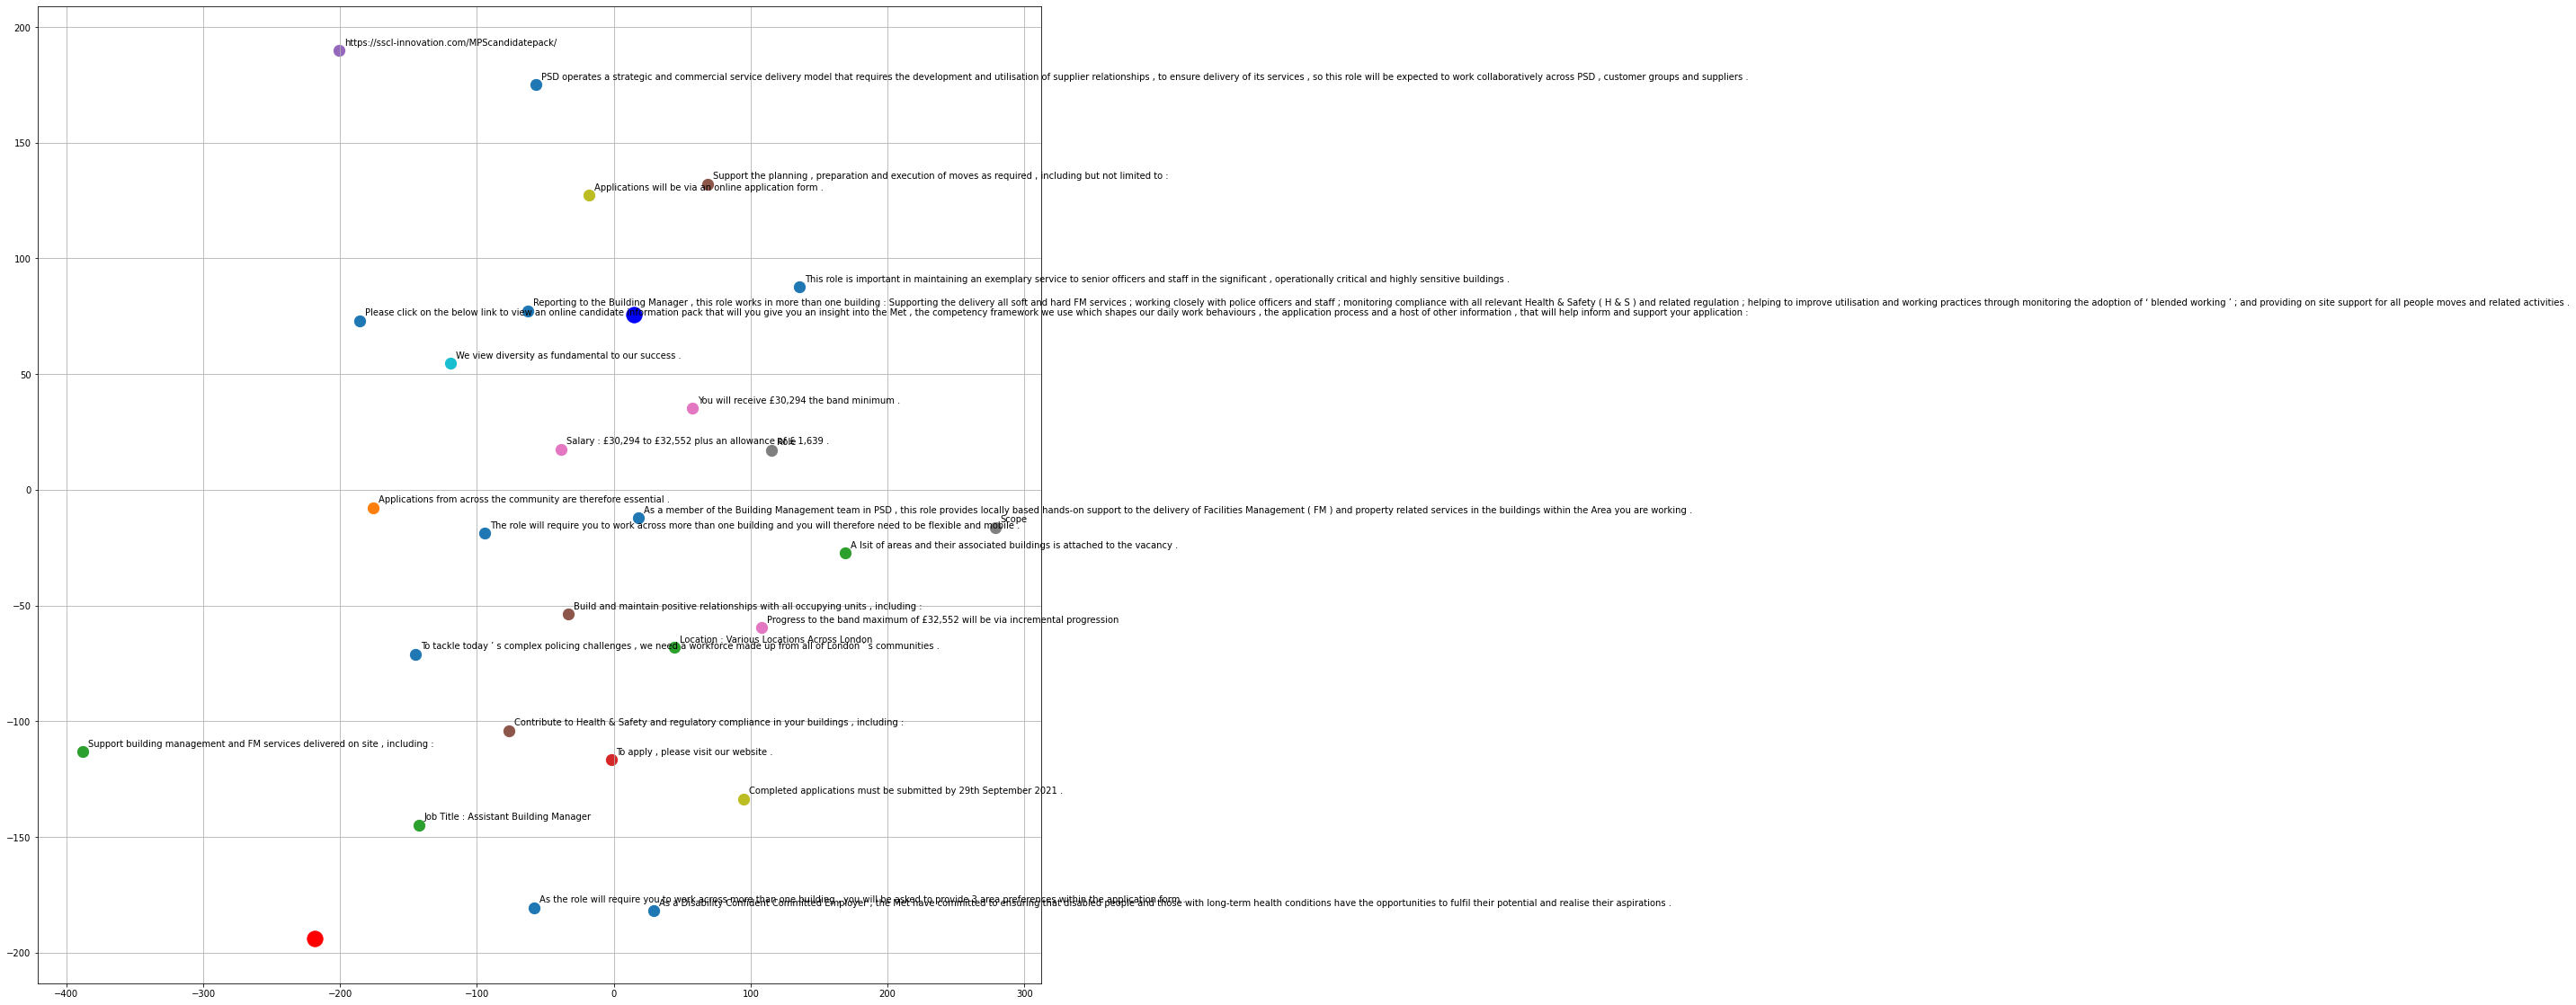

In [ ]:
for x in range(len(job_ads)):
  job_ad = job_ads[1] 
  corpus=job_ad
  corpus_embd=[]
  for sent in job_ad:
      token_ids, word_embd, sent_embd = bert_embd(sent)
      corpus_embd.append(sent_embd.tolist())
      corpus_embeddings=corpus_embd

  # Perform kmean clustering
  if len(job_ad)>10:
    num_clusters = 10
  else:
    num_clusters=len(job_ad)

  clustering_model = KMeans(n_clusters=num_clusters)
  clustering_model.fit(corpus_embeddings)
  cluster_assignment = clustering_model.labels_

  clustered_sentences = [[] for i in range(num_clusters)]
  for sentence_id, cluster_id in enumerate(cluster_assignment):
      clustered_sentences[cluster_id].append(corpus[sentence_id])

  for i, cluster in enumerate(clustered_sentences):
      print("Cluster ", i+1)
      print(cluster)
      print("")


  # rational_words=['rational', 'logical', 'analytical'] 
  rational_words=['you', 'are', 'rational'] 
  token_ids, word_embd, sent_embd = bert_embd(' '.join(rational_words))
  corpus_embd.append(sent_embd.tolist())

  # intuitive_words=['perceptive', 'intuitive', 'understanding']
  intuitive_words=['you', 'are', 'sensitive']
  token_ids, word_embd, sent_embd = bert_embd(' '.join(intuitive_words))
  corpus_embd.append(sent_embd.tolist())

  tsne = TSNE(n_components=2, random_state=0)
  v2d = tsne.fit_transform(corpus_embd)
  # pca = PCA(n_components=2, random_state=0)
  # v2d = pca.fit_transform(corpus_embeddings)
  v2d, male, female = np.split(v2d, [v2d.shape[0]-2, v2d.shape[0]-1])

  u_labels = np.unique(cluster_assignment)
  for i in u_labels:
      plt.scatter(v2d[cluster_assignment == i , 0] , v2d[cluster_assignment == i , 1] , label = i, s=150)
  plt.scatter(male[0,0], male[0,1], s=300, color='blue')
  plt.scatter(female[0,0], female[0,1], s=300, color='red') 

  # # # for label, x, y in zip(range(v2d.shape[0]-2),v2d[:v2d.shape[0]-2, 0], v2d[:v2d.shape[0]-2, 1]):
  for label, x, y in zip(job_ad,v2d[:, 0], v2d[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(6, 6), textcoords="offset points", fontsize=10)

  # plt.xlim(-100,400)
  # plt.ylim(-400,100)
  plt.grid()
  plt.gcf().set_size_inches((20, 20))    
  plt.show()

Clustering on multiple ads with stereotype words added. (not working correctly)

In [ ]:
job_ad_collection=[]
for ad in job_ads:
  for sent in ad:
    job_ad_collection.append(sent)

rational_words=['you', 'are', 'rational'] 
intuitive_words=['you', 'are', 'sensitive']
job_ad.append(' '.join(rational_words))
job_ad.append(' '.join(intuitive_words))
corpus=job_ad_collection

corpus_embd=[]
for sent in job_ad_collection:
    token_ids, word_embd, sent_embd = bert_embd(sent)
    corpus_embd.append(sent_embd.tolist())
corpus_embeddings=corpus_embd

# Perform kmean clustering
num_clusters = 20
clustering_model = KMeans(n_clusters=num_clusters)
clustering_model.fit(corpus_embeddings)
cluster_assignment = clustering_model.labels_

clustered_sentences = [[] for i in range(num_clusters)]
for sentence_id, cluster_id in enumerate(cluster_assignment):
    clustered_sentences[cluster_id].append(corpus[sentence_id])

for i, cluster in enumerate(clustered_sentences):
    print("Cluster ", i+1)
    print(cluster)
    print("")


Cluster  1
['Keyduties include :', 'Some of the attributes we are looking for include :', 'Applications from across the community are therefore essential .', 'The 1st line support role will have the following responsibilities :', 'The ideal candidate will have the following :', '* #LI-KB1*']

Cluster  2
['Make a real impact at Fusion21 andjoin our expanding Procurement team', 'Were recruiting for an experienced Project Manager to provide OJEU related procurement activities for Fusion21s busy Compliance business unit .', 'Fusion21 runs tender processes for compliance contracts and is seeking to strengthen its procurement team with someone with good health safety / safety management system knowledge .', 'Ifyou have experience in the construction , engineering or property sector ; have acustomer-focused approach and can support colleagues when required , we want tohear from you .', 'Forfurther discussion , please contact Charlotte Simister , HR Hiring Lead atFusion21 , Tel : 0151 347 8392

In [25]:
for x in range(len(job_ads)):
  job_ad = job_ads[1] 
  trigrams_set=[]
 
  corpus_embd=[]
  for sent in job_ad:
      token_ids, word_embd, sent_embd = bert_embd(sent)
      sent = sent.translate(remove_punctuation)
      sent = sent.translate(remove_digits)
      # tokens = nltk.word_tokenize(sent)
      tokens = tokenizer.tokenize(sent)
      # tokens = [i.lower() for i in tokens]
      tokens = [i for i in tokens if i not in stopwords.words('english')]
      # trigrams = nltk.trigrams(tokens)
      if len(tokens) > 2:
        trigrams = [tokens[i:i+3] for i in range(len(tokens)-2)]
        for triple in trigrams:
          trigram_token_ids = tokenizer.convert_tokens_to_ids(triple)
          index = []
          for id in trigram_token_ids:
            try: 
              index.append(token_ids[0].tolist().index(id))
            except ValueError:
              pass
          trigram_vec = [word_embd[ind] for ind in index]
          if len(trigram_vec) >= 2:
            trigram_embd = torch.mean(torch.stack(trigram_vec), dim=0)
            corpus_embd.append(trigram_embd.tolist())
            trigrams_set.append(triple)


  # rational_words=['rational', 'logical', 'analytical'] 
  rational_words=['Lead', 'supervise', 'dominant'] 
  # rational_words=['rational', 'independent', 'man'] 
  # rational_words=['you', 'are', 'rational'] 
  # trait = 'you are ' + ' '.join(rational_words)
  trait=rational_words
  token_ids, word_embd, sent_embd_rat = bert_embd(trait)
  corpus_embd.append(sent_embd_rat.tolist())

  # intuitive_words=['perceptive', 'intuitive', 'understanding']
  intuitive_words=['supportive', 'assist', 'aide']
  # intuitive_words=['10', 'yes', '?' ]
  # intuitive_words=['you', 'are', 'sensitive']
  trait1=intuitive_words
  # trait1 = 'you are ' + ' '.join(intuitive_words)
  token_ids, word_embd, sent_embd_int = bert_embd(trait1)
  corpus_embd.append(sent_embd_int.tolist())

  corpus_embeddings=corpus_embd
  corpus=trigrams_set
  corpus.append(trait)
  corpus.append(trait1)

  # Perform kmean clustering
  if len(corpus_embeddings)>20:
    num_clusters = 20
  else:
    num_clusters=len(job_ad)

  clustering_model = KMeans(n_clusters=num_clusters)
  clustering_model.fit(corpus_embeddings)
  cluster_assignment = clustering_model.labels_

  clustered_sentences = [[] for i in range(num_clusters)]
  for sentence_id, cluster_id in enumerate(cluster_assignment):
      clustered_sentences[cluster_id].append(corpus[sentence_id])

  for i, cluster in enumerate(clustered_sentences):
      print("Cluster ", i+1)
      print(cluster)
      print("")


  tsne = TSNE(n_components=2, random_state=0)
  v2d = tsne.fit_transform(corpus_embd)
  # pca = PCA(n_components=2, random_state=0)
  # v2d = pca.fit_transform(corpus_embeddings)
  # v2d, male, female = np.split(v2d, [v2d.shape[0]-2, v2d.shape[0]-1])
  male=v2d[v2d.shape[0]-2]
  female=v2d[v2d.shape[0]-1]
  u_labels = np.unique(cluster_assignment)
  for i in u_labels:
      plt.scatter(v2d[cluster_assignment == i , 0] , v2d[cluster_assignment == i , 1] , label = i, s=150)
  plt.scatter(male[0], male[1], s=300, color='blue')
  plt.scatter(female[0], female[1], s=300, color='red') 

  # # # # for label, x, y in zip(range(v2d.shape[0]-2),v2d[:v2d.shape[0]-2, 0], v2d[:v2d.shape[0]-2, 1]):
  # for label, x, y in zip(job_ad,v2d[:, 0], v2d[:, 1]):
  #   plt.annotate(label, xy=(x, y), xytext=(6, 6), textcoords="offset points", fontsize=10)

  # plt.xlim(-100,400)
  # plt.ylim(-400,100)
  plt.grid()
  plt.gcf().set_size_inches((20, 20))    
  plt.show()

RuntimeError: ignored